<a href="https://colab.research.google.com/github/adimemes/Clustering/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_I_Kadek_Adi_Memes_Subagia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer # type: ignore
from joblib import dump

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = "/content/drive/MyDrive/bank_transactions_data_edited.csv"
Bank_data = pd.read_csv(url)

In [4]:
Bank_data.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [5]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

kemudian ada .info() yang mengeluarkan output info dari setiap kolom pada dataset mulai dari nama kolom, jumlah barisnya dan juga type data dari kolomnya.
untuk lebih rinci kolom setiap data yaitu :


| Fitur                 | Deskripsi                          |
| --------------------- | ---------------------------------- |
| `TransactionAmount`   | Nilai transaksi                    |
| `TransactionType`     | Debit / Credit                     |
| `Location`            | Kota asal transaksi                |
| `Channel`             | ATM / Online / Branch              |
| `CustomerAge`         | Umur pelanggan (ada missing value) |
| `CustomerOccupation`  | Pekerjaan pelanggan                |
| `TransactionDuration` | Lama waktu transaksi (detik?)      |
| `LoginAttempts`       | Jumlah percobaan login             |
| `TransactionID`       | Id Transaksi pelanggan             |
| `AccountID`           | Acount Id pelanggan                |
| `IP Address`          | IP Addres dari Pelanggan           |
| `DeviceID`            | ID Device dari pelanggan           |
| `MerchantID `         | ID MErchant                        |


In [6]:
Bank_data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

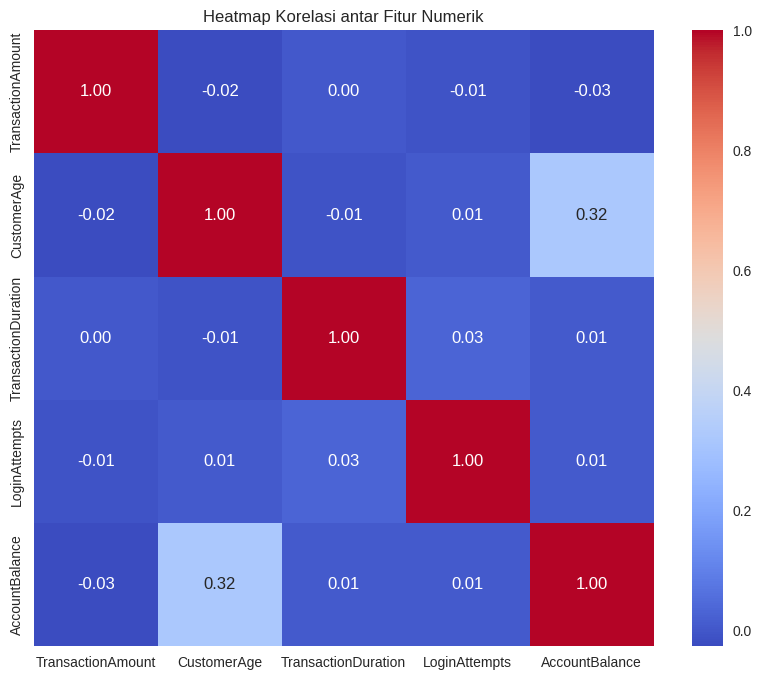

In [7]:
# Ambil hanya kolom numerik
numerik_data = Bank_data.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi
corr = numerik_data.corr()

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.show()

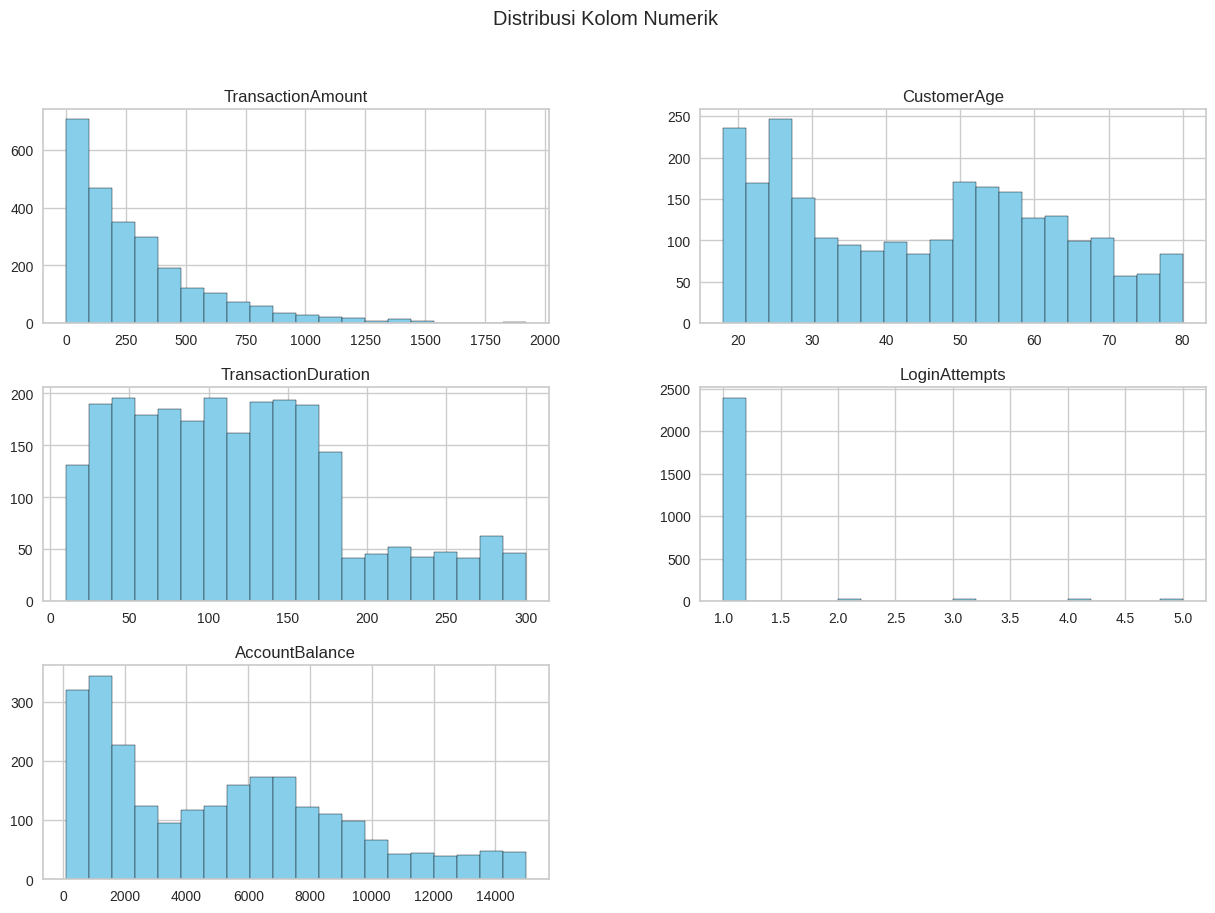

In [8]:
numerik_data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Kolom Numerik")
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

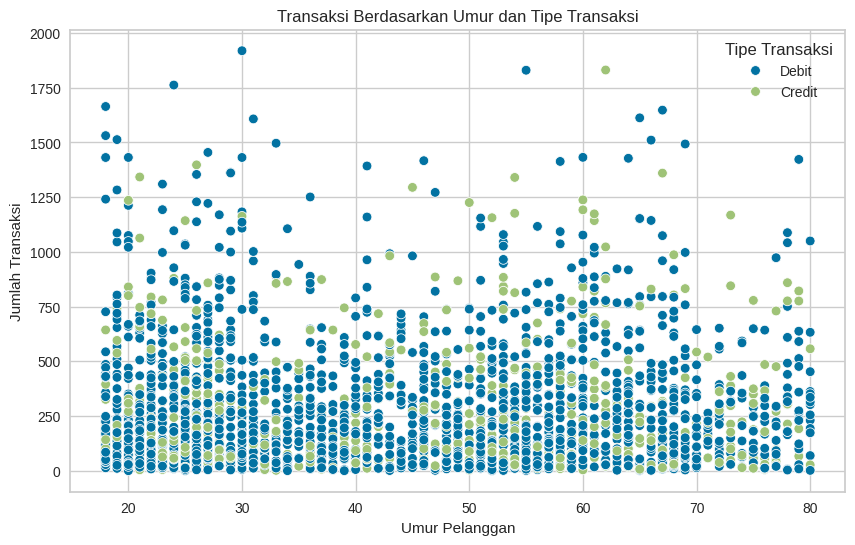

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Bank_data, x='CustomerAge', y='TransactionAmount', hue='TransactionType')
plt.title('Transaksi Berdasarkan Umur dan Tipe Transaksi')
plt.xlabel('Umur Pelanggan')
plt.ylabel('Jumlah Transaksi')
plt.legend(title='Tipe Transaksi')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


Sebelum melakukan suruhan pada thapan pembersihan dan pemrosesan data, ada kejanggalan pada type data  dan  

*   ```TransactionDate```
*   ```PreviousTransactionDate```

yang masih bertype object dan disini akan dirubah menjadi type data datetime

In [10]:
Bank_data[['TransactionDate', 'PreviousTransactionDate']] = Bank_data[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime)

In [11]:
print("Jumlah Missing Value di setiap kolom:")
print(Bank_data.isnull().sum())

Jumlah Missing Value di setiap kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [12]:
print("Jumlah Duplikasi Data:")
print(Bank_data.duplicated().sum())

Jumlah Duplikasi Data:
21


In [13]:

# menambah colom Age pada dataframe
Bank_data_Age = Bank_data['CustomerAge']
numerical_cols = Bank_data.select_dtypes(include='number').columns.tolist()
print(numerical_cols)

scaler = MinMaxScaler()
Bank_data[numerical_cols] = scaler.fit_transform(Bank_data[numerical_cols])
Bank_data['Age'] = Bank_data_Age
# Cek hasil
Bank_data.head(5)

['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Age
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,70.0
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,68.0
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,19.0
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,26.0
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39,NaN


In [14]:
Bank_data = Bank_data.drop(['TransactionID', 'AccountID', 'DeviceID',  'IP Address', 'MerchantID' ], axis=1, errors='ignore')

In [15]:
categorical_cols = Bank_data.select_dtypes(include='object').columns

le = LabelEncoder()
Bank_data_Encoder = Bank_data.copy()
for col in categorical_cols:
    Bank_data_Encoder[col] = le.fit_transform(Bank_data[col])

# Cek hasil
Bank_data[categorical_cols] = Bank_data_Encoder[categorical_cols]
Bank_data.head(5)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Age
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,70.0
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,68.0
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,19.0
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,26.0
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,NaN


In [16]:
Bank_data.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate',
 'Age']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [17]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
Bank_data = Bank_data.dropna()
Bank_data.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [18]:
Bank_data = Bank_data.drop_duplicates()
Bank_data.duplicated().sum()

np.int64(0)

In [19]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2348 entries, 0 to 2535
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2348 non-null   float64       
 1   TransactionDate          2348 non-null   datetime64[ns]
 2   TransactionType          2348 non-null   int64         
 3   Location                 2348 non-null   int64         
 4   Channel                  2348 non-null   int64         
 5   CustomerAge              2348 non-null   float64       
 6   CustomerOccupation       2348 non-null   int64         
 7   TransactionDuration      2348 non-null   float64       
 8   LoginAttempts            2348 non-null   float64       
 9   AccountBalance           2348 non-null   float64       
 10  PreviousTransactionDate  2348 non-null   datetime64[ns]
 11  Age                      2348 non-null   float64       
dtypes: datetime64[ns](2), float64(6), int64

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [20]:
Q1 = Bank_data.quantile(0.25)
Q3 = Bank_data.quantile(0.75)
IQR = Q3 - Q1

# Buang data di luar rentang IQR
Bank_data = Bank_data[~((Bank_data < (Q1 - 1.5 * IQR)) | (Bank_data > (Q3 + 1.5 * IQR))).any(axis=1)]


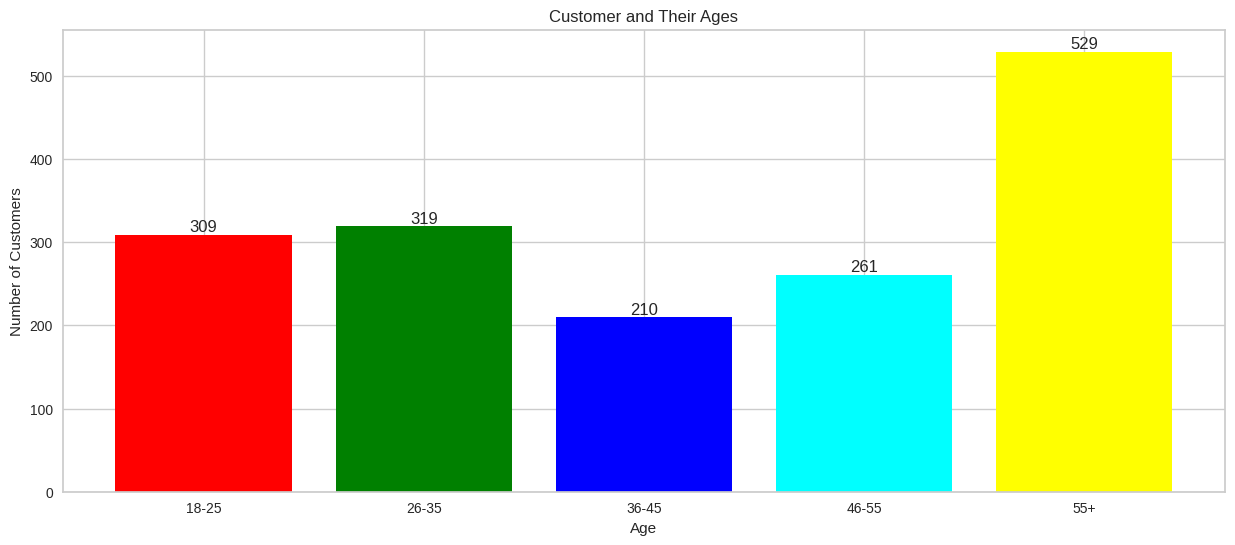

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Customer_Age_encoded
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,5
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,5
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,1
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,2
5,0.047888,2023-04-03 17:15:01,1,28,0,0.000000,3,0.558621,0.0,0.045738,2024-11-04 08:06:36,1


In [21]:
age18_25 = Bank_data.Age[(Bank_data.Age >= 18) & (Bank_data.Age <= 25)]
age26_35 = Bank_data.Age[(Bank_data.Age >= 26) & (Bank_data.Age <= 35)]
age36_45 = Bank_data.Age[(Bank_data.Age >= 36) & (Bank_data.Age <= 45)]
age46_55 = Bank_data.Age[(Bank_data.Age >= 46) & (Bank_data.Age <= 55)]
age55above = Bank_data.Age[Bank_data.Age >= 56]

# menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
plt.show()

bins = [17, 25, 35, 45, 55, Bank_data['Age'].max()]
labels = ['18-25', '26-35', '36-45', '46-55', '55+']

# Melakukan binning pada CustomerAge
Bank_data['Customer_Age_binned'] = pd.cut(Bank_data['Age'], bins=bins, labels=labels)
le = LabelEncoder()
Bank_data['Customer_Age_encoded'] = le.fit_transform(Bank_data['Customer_Age_binned'])+1

Bank_data = Bank_data.drop(columns=['Customer_Age_binned','Age'])
Bank_data.head(5)


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [22]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
Bank_data.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Customer_Age_encoded
count,1628.000000,1628,1628.0,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0,1628.000000,1628,1628.000000
mean,0.130730,2023-07-03 12:43:58.102579968,1.0,21.435504,0.923219,0.426389,1.530098,0.376182,0.0,0.334951,2024-11-04 08:09:23.688574976,3.234644
min,0.000000,2023-01-02 16:00:06,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2024-11-04 08:06:23,1.000000
25%,0.040257,2023-03-30 16:07:10.750000128,1.0,11.000000,0.000000,0.145161,0.000000,0.175862,0.0,0.092558,2024-11-04 08:07:57,2.000000
50%,0.099797,2023-07-04 17:08:42.500000,1.0,21.000000,1.000000,0.419355,2.000000,0.348276,0.0,0.311965,2024-11-04 08:09:24,3.000000
75%,0.190807,2023-10-04 17:07:43.249999872,1.0,32.000000,2.000000,0.661290,3.000000,0.527586,0.0,0.505751,2024-11-04 08:10:52,5.000000
max,0.470558,2024-01-01 18:21:50,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,2024-11-04 08:12:23,5.000000
std,0.111416,NaN,0.0,12.436791,0.840509,0.286485,1.155816,0.244699,0.0,0.258260,NaN,1.536758


      TransactionAmount  TransactionDuration
0              0.007207             0.244828
1              0.195940             0.451724
2              0.065680             0.158621
3              0.096016             0.051724
4              0.047888             0.558621
...                 ...                  ...
1623           0.130953             0.575862
1624           0.014785             0.468966
1625           0.096782             0.031034
1626           0.006212             0.231034
1627           0.120833             0.141379

[1628 rows x 2 columns]


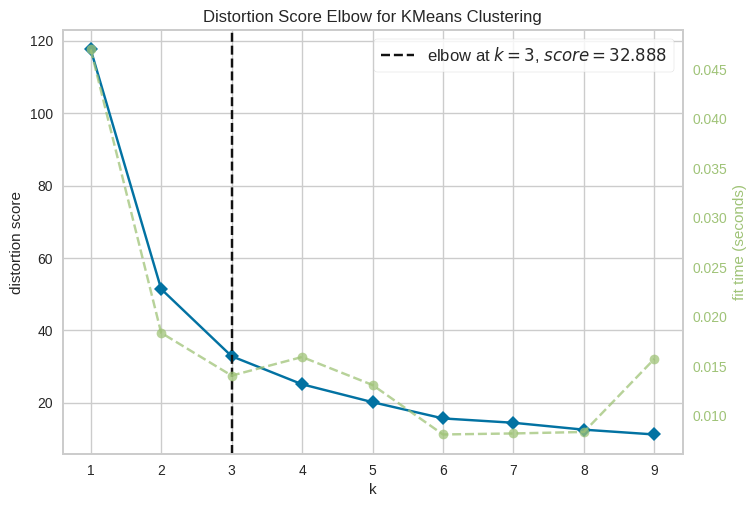

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Mengambil kolom 'TransactionAmount' dan 'TransactionDuration' dari dataset dan menyimpannya dalam array X
data_important = Bank_data[['TransactionAmount', 'TransactionDuration']].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(data_important, columns=['TransactionAmount', 'TransactionDuration']))

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(data_important)
visualizer.show()

In [24]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans.fit(data_important)

labels = model_kmeans.labels_
Bank_data['labels'] = labels

k = 3

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        print(f"\nCluster {cluster_id + 1}:")
        for col in cluster_data.columns:
                mean_value = cluster_data[col].mean()
                print(f"Rata-rata {col}: {mean_value:.2f}")
        print("--------------------------------")
        for col in cluster_data.columns:
                median_value = cluster_data[col].median()
                print(f"Median {col}: {median_value:.2f}")
        print("--------------------------------")
        for col in cluster_data.columns:
                max_value = cluster_data[col].max()
                print(f"Nilai maksimum {col}: {max_value:.2f}")


# Analisis karakteristik setiap cluster
analyze_clusters(Bank_data, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 0.13
Rata-rata TransactionDate: .2f
Rata-rata TransactionType: 1.00
Rata-rata Location: 20.22
Rata-rata Channel: 0.90
Rata-rata CustomerAge: 0.41
Rata-rata CustomerOccupation: 1.59
Rata-rata TransactionDuration: 0.82
Rata-rata LoginAttempts: 0.00
Rata-rata AccountBalance: 0.31
Rata-rata PreviousTransactionDate: .2f
Rata-rata Customer_Age_encoded: 3.15
Rata-rata labels: 0.00
--------------------------------
Median TransactionAmount: 0.10
Median TransactionDate: .2f
Median TransactionType: 1.00
Median Location: 20.00
Median Channel: 1.00
Median CustomerAge: 0.39
Median CustomerOccupation: 2.00
Median TransactionDuration: 0.81
Median LoginAttempts: 0.00
Median AccountBalance: 0.28
Median PreviousTransactionDate: .2f
Median Customer_Age_encoded: 3.00
Median labels: 0.00
--------------------------------
Nilai maksimum TransactionAmount: 0.45
Nilai maksimum TransactionDate: .2f
Nilai maksimum TransactionType: 1.0

Jalankan cell code ini untuk menyimpan model kamu.

In [25]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [26]:
# Menghitung dan menampilkan nilai Silhouette Score.
# Calculate the silhouette score using the same data used to train the KMeans model
silhouette_avg = silhouette_score(data_important, model_kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.43932656918051305


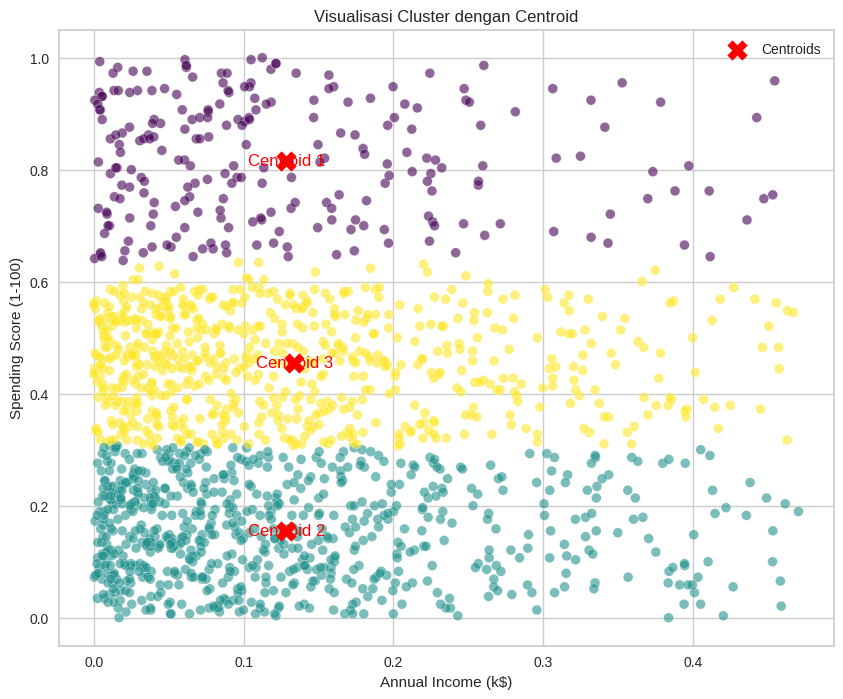

Nilai Centroids:
Centroid 1: Annual Income = 0.13, Spending Score = 0.82
Centroid 2: Annual Income = 0.13, Spending Score = 0.15
Centroid 3: Annual Income = 0.13, Spending Score = 0.46


In [27]:
# Membuat visualisasi hasil clustering
# Membuat visualisasi hasil clustering
centroids = model_kmeans.cluster_centers_

# Menampilkan centroid dari setiap cluster
plt.figure(figsize=(10, 8))

# Plot data
plt.scatter(data_important[:, 0], data_important[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

            PC1       PC2  Target
0     14.562028  2.341703       1
1     -6.436815  2.365466       2
2      1.567502 -2.727536       1
3     11.565500 -1.789218       1
4      6.568405 -2.678526       2
...         ...       ...     ...
1623  18.565048  1.391762       2
1624  14.560854  1.357813       2
1625 -11.432401 -2.731480       1
1626   5.559785  1.392400       1
1627   7.565532  0.058358       1

[1628 rows x 3 columns]


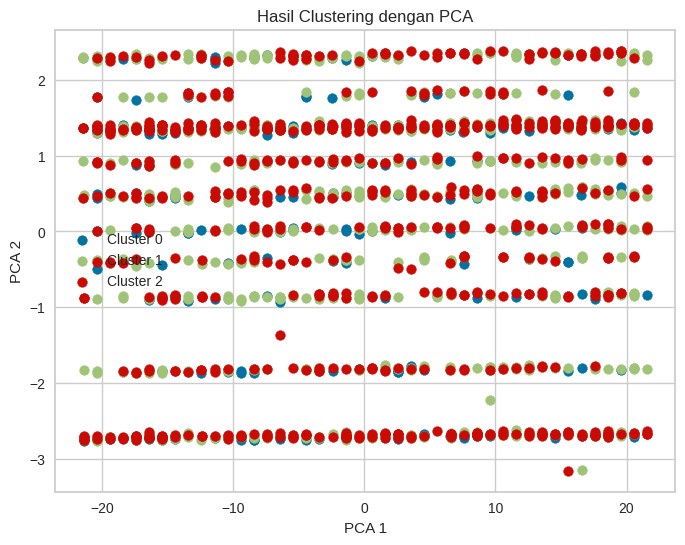

In [28]:
# Membangun model menggunakan PCA.
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
# Exclude the datetime columns before applying PCA
Bank_data_numeric = Bank_data.drop(columns=['TransactionDate', 'PreviousTransactionDate'])
Bank_data_pca = pca.fit_transform(Bank_data_numeric)
pca_result = pd.DataFrame(data=Bank_data_pca, columns=['PC1', 'PC2'])
pca_result['Target'] = model_kmeans.labels_
print(pca_result)

plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = pca_result[pca_result['Target'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hasil Clustering dengan PCA')
plt.legend()
plt.show()

In [29]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [30]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
kolom_numerik = Bank_data.select_dtypes(include='number').columns
kolom_kategorikal = Bank_data[['TransactionType', 'Channel', 'CustomerOccupation']].columns

# Hitung agregasi numerik
agregasi_numerik = Bank_data.groupby('labels')[kolom_numerik].agg(['mean', 'min', 'max'])

# Tampilkan tabel dengan styling agar rapi
agregasi_numerik.style\
    .set_caption("Agregasi Mean, Min, Max per Label untuk Fitur Numerik")\
    .format(precision=2)\
    .background_gradient(axis=0, cmap='YlGnBu')\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'Red'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('font-weight', 'bold')]}
    ])

<Figure size 1000x600 with 0 Axes>

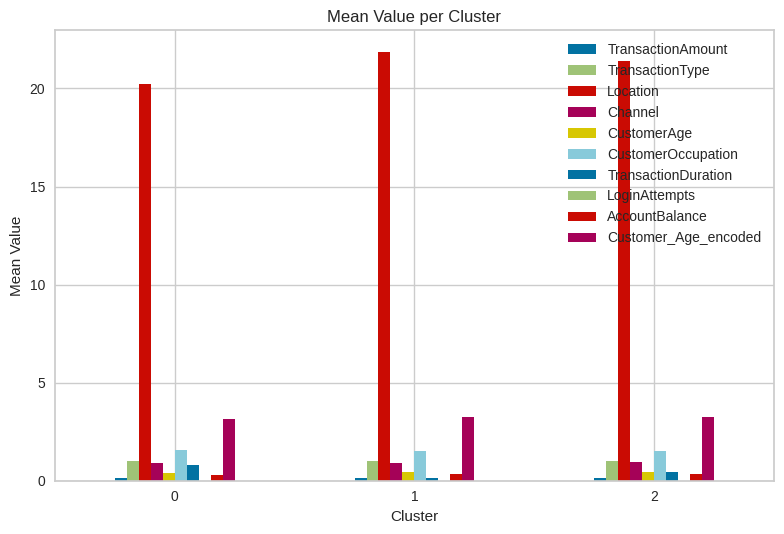



Modus Kategorikal :


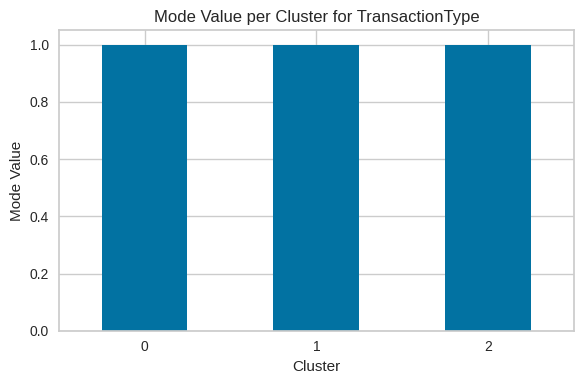

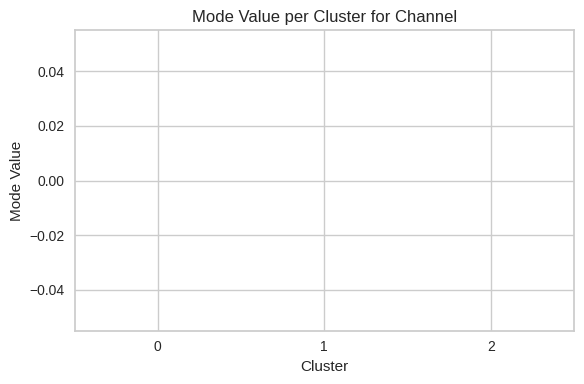

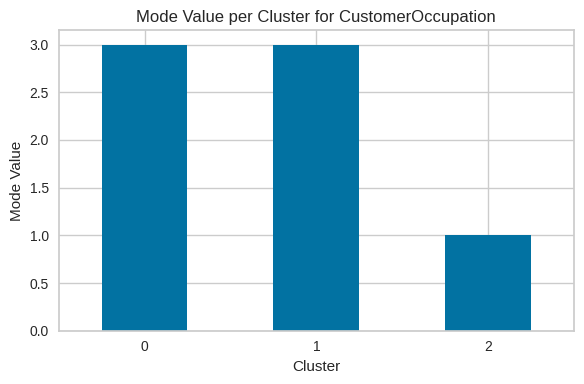

In [31]:
# Ambil nama kolom numerik kecuali 'TransactionAmount', 'CustomerAge', dan 'labels'
kolom_numerik = [col for col in Bank_data.select_dtypes(include='number').columns if col not in ['labels','CustomerAge_encoded']]

mean_per_cluster = Bank_data.groupby('labels')[kolom_numerik].mean()
plt.figure(figsize=(10, 6))
mean_per_cluster.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Mean Value per Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n")

print("Modus Kategorikal :")
for col in kolom_kategorikal:
    mode_per_cluster = Bank_data.groupby('labels')[col].agg(pd.Series.mode)
    plt.figure(figsize=(6, 4))
    mode_per_cluster.plot(kind='bar')
    plt.xlabel('Cluster')
    plt.ylabel('Mode Value')
    plt.title(f'Mode Value per Cluster for {col}')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [32]:
kolom_numerik = Bank_data.drop(columns='labels').select_dtypes(include='number').columns
scaler = MinMaxScaler()
scaler.fit(Bank_data[kolom_numerik])

df_inverse = pd.DataFrame(scaler.inverse_transform(Bank_data[kolom_numerik]), columns=kolom_numerik)
df_inverse['labels'] = Bank_data['labels']
print(df_inverse)

print("\n")
print("Rata-rata nilai asli per cluster:")
print(df_inverse.groupby('labels')[kolom_numerik].mean())

      TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              0.003392              2.0    1548.0      0.0     0.838710   
1              0.092201              2.0     645.0      0.0     0.806452   
2              0.030906              2.0     989.0      6.0     0.016129   
3              0.045181              2.0    1419.0      6.0     0.129032   
4              0.022534              2.0    1204.0      0.0     0.000000   
...                 ...              ...       ...      ...          ...   
1623           0.061621              2.0    1720.0      3.0     0.483871   
1624           0.006957              2.0    1548.0      3.0     0.612903   
1625           0.045541              2.0     430.0      6.0     0.080645   
1626           0.002923              2.0    1161.0      3.0     0.935484   
1627           0.056859              2.0    1247.0      0.0     0.306452   

      CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0      

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [33]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
Bank_data['Target'] = model_kmeans.labels_
Bank_data.drop(columns='labels', inplace=True)

print("Kolom saat ini:", Bank_data.columns)

Kolom saat ini: Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'Customer_Age_encoded', 'Target'],
      dtype='object')


In [34]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
Bank_data.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [35]:
Bank_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1628 entries, 0 to 2524
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        1628 non-null   float64       
 1   TransactionDate          1628 non-null   datetime64[ns]
 2   TransactionType          1628 non-null   int64         
 3   Location                 1628 non-null   int64         
 4   Channel                  1628 non-null   int64         
 5   CustomerAge              1628 non-null   float64       
 6   CustomerOccupation       1628 non-null   int64         
 7   TransactionDuration      1628 non-null   float64       
 8   LoginAttempts            1628 non-null   float64       
 9   AccountBalance           1628 non-null   float64       
 10  PreviousTransactionDate  1628 non-null   datetime64[ns]
 11  Customer_Age_encoded     1628 non-null   int64         
 12  Target                   1628 non-null 

In [36]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.
scaled_coloumns = Bank_data.select_dtypes(include='number').columns
scaled_coloumns = scaled_coloumns.drop('Target')
Bank_data_normalized = {}
for col in scaled_coloumns:
    le = LabelEncoder()
    Bank_data[col] = le.fit_transform(Bank_data[col])
    Bank_data_normalized[col] = le.inverse_transform(Bank_data[col])
    # df[col] = label_encoder[col].inverse_transform(df[col])
    # df_normalized[col] = label_encoder.inverse_transform(df[col])

Bank_data.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Customer_Age_encoded,Target
0,78,2023-04-11 16:29:14,0,36,0,52,0,71,0,846,2024-11-04 08:08:08,4,1
1,1211,2023-06-27 16:44:19,0,15,0,50,0,131,0,1581,2024-11-04 08:09:35,4,2
2,588,2023-07-10 18:16:08,0,23,2,1,3,46,0,302,2024-11-04 08:07:04,0,1
3,777,2023-05-05 16:32:11,0,33,2,8,3,15,0,1318,2024-11-04 08:09:06,1,1
5,451,2023-04-03 17:15:01,0,28,0,0,3,162,0,180,2024-11-04 08:06:36,0,2


In [37]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
arr_inverse = Bank_data.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values
print(arr_inverse.compress)
analyze_clusters(Bank_data, labels, k)

<built-in method compress of numpy.ndarray object at 0x7d5ff287a370>
Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 791.26
Rata-rata TransactionDate: .2f
Rata-rata TransactionType: 0.00
Rata-rata Location: 20.22
Rata-rata Channel: 0.90
Rata-rata CustomerAge: 25.57
Rata-rata CustomerOccupation: 1.59
Rata-rata TransactionDuration: 232.12
Rata-rata LoginAttempts: 0.00
Rata-rata AccountBalance: 777.65
Rata-rata PreviousTransactionDate: .2f
Rata-rata Customer_Age_encoded: 2.15
Rata-rata Target: 0.00
--------------------------------
Median TransactionAmount: 798.50
Median TransactionDate: .2f
Median TransactionType: 0.00
Median Location: 20.00
Median Channel: 1.00
Median CustomerAge: 24.00
Median CustomerOccupation: 2.00
Median TransactionDuration: 233.00
Median LoginAttempts: 0.00
Median AccountBalance: 752.50
Median PreviousTransactionDate: .2f
Median Customer_Age_encoded: 2.00
Median Target: 0.00
--------------------------------
Nilai maksimum TransactionA

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [38]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
Bank_data['Target'] = model_kmeans.labels_

In [39]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
Bank_data.to_csv('data_clustering_inverse.csv', index=False)